# 회귀 분석/  환경에 따른 주택 가격 예측 프로젝트

In [1]:
import warnings

warnings.filterwarnings(action='ignore') 

### - 머신러닝 패키지 sklearn 설치

In [2]:
# !pip install sklearn

## 1) 데이터 수집

In [4]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
boston =  load_boston()

- 사이킷런에서 제공하는 데이터셋sklearn.datasets 중에서 보스톤 주택 가격 데이터셋을 사용하기 위해 load_boston을임포트하고, 데이터셋을 로드하여load_boston( ) 객체boston를 생성

## 2) 데이터 준비 및 탐색

### 2-1 데이터가 이미 정리된 상태이므로 데이터셋 구성을 확인

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

- 데이터셋에 대한 설명boston.DESCR을 확인

In [6]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


- 데이터셋 객체의 data 배열boston.data,즉 독립 변수 X가 되는 피처들을 DataFrame 자료형으로 변환하여 boston_df를 생성boston_df의 데이터 5개를 확인bostone_df.head( )

In [7]:
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 데이터셋 객체의 target 배열 boston.target, 즉 종속 변수인 주택 가격(‘PRICE’) 컬럼을 boston_df에 추가boston_df의 데이터 5개를 확인bostone_df.head( )

In [8]:
print('보스톤 주택 가격 데이터셋 크기 : ', boston_df.shape)

보스톤 주택 가격 데이터셋 크기 :  (506, 14)


- 데이터셋의 형태 boston_df.shape, 즉 행의 개수(데이터 개수)와 열의 개수(변수 개수)를 확인행의 개수가 506이므로 데이터가 506개 있으며, 열의 개수가 14이므로 변수가 14개 있음 변수 중에서 13개는 독립 변수 X가 되고, 마지막 변수 ‘PRICE’는 종속 변수 Y가 됨

In [9]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


- boston_df에 대한 정보를 확인boston.info( )

## 3) 분석 모델 구축

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Y = boston_df['PRICE']
X = boston_df.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

lr = LinearRegression()

lr.fit(X_train, Y_train)

LinearRegression()

- 사이킷런을 사용하여 머신러닝 회귀 분석을 하기 위한 LinearRegression과 데이터셋 분리 작업을 위한train_test_split, 성능 측정을 위한 평가 지표인 mean_squared_ error, r2_score를 임포트
- PRICE 피처를 회귀식의 종속 변수 Y로 설정하고 PRICE를 제외 drop( )한 나머지 피처를 독립 변수 X로 설정
- X와 Y 데이터 506개를 학습 데이터와 평가 데이터로 7:3 비율로 분할test_size=0.3
- 선형 회귀 분석 모델 객체 lr을 생성
- 학습 데이터 XX_train와 YY_train를 가지고 학습을 수행fit( ). 

## 4) 결과 분석 및 시각화

In [11]:
Y_predict = lr.predict(X_test)

mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 17.297, RMSE : 4.159
R^2(Variance score) : 0.757


- 평가 데이터 XX_test를 가지고 예측을 수행하여predict( ) 예측값YY_predict를 구함
- 회귀 분석은 지도 학습이므로 평가 데이터 X에 대한 결과값 YY_test를 이미 알고 있는 상태에서 평가 데이터 YY_test와 Y_predict의 오차를 계산하여 모델을 평가. 평가 지표 MSE를 구하고mean_squared_error( )구한 값의 제곱근을 계산하여np.sqrt(mse) 평가 지표 RMSE를 구함 그리고 평가 지표 R2 을 구함r2_score( )

In [12]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  40.995595172164315
회귀 계수 값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


- 선형 회귀의 Y절편 lr.intercept_과 각 피처의 회귀 계수 lr.coef_를 확인

In [13]:
coef = pd.Series(data = np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending = False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
B           0.01
AGE         0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

- 회귀 모델에서 구한 회귀 계수 값lr.coef_과 피처 이름X.columns을 묶어서 Series 자료 형으로 만들고, 회귀 계수 값을기준으로 내림차순으로 정렬하여 ascending=False 확인sort_ values( )

### - 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

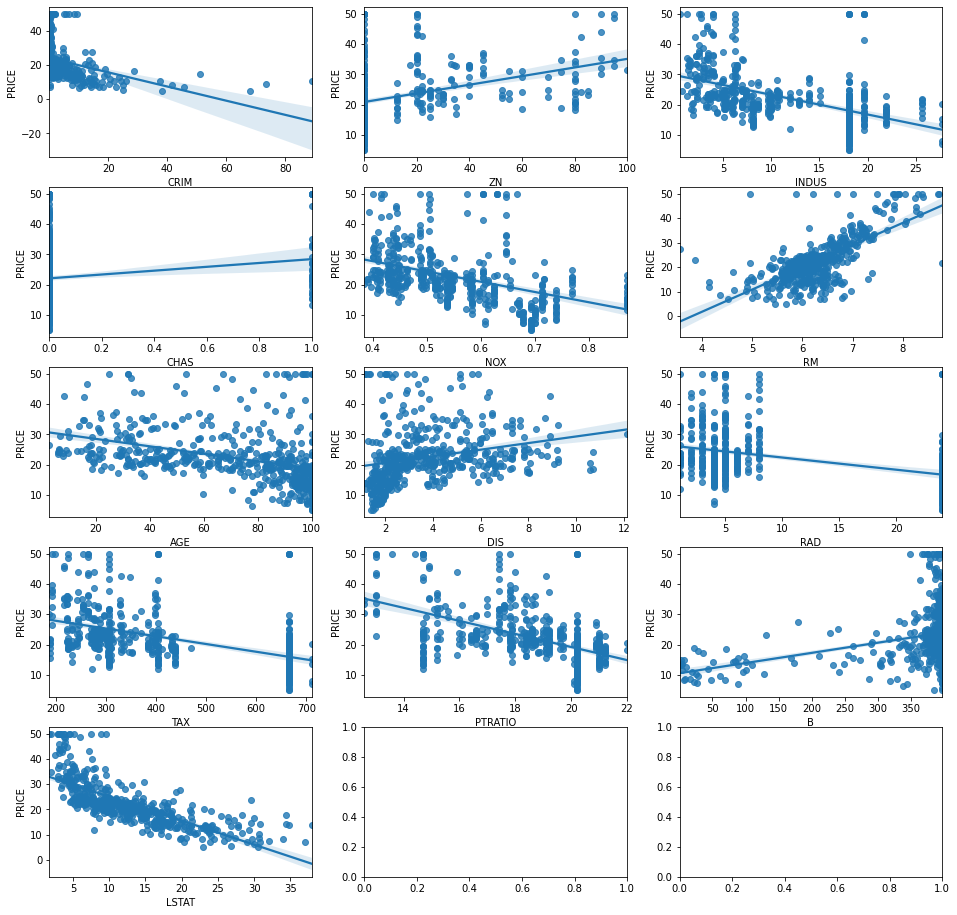

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)

x_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])

- 시각화에 필요한 모듈을 임포트
- 독립 변수인 13개 피처와 종속 변수인 주택 가격, PRICE와의 회귀 관계를 보여주는 13개 그래프를 subplots()를 사용하여 5행 3열 구조로 모아서 나타냄 seaborn의 regplot()은 산점도 그래프와 선형 회귀 그래프를 함께 그려줌
